In [25]:
%matplotlib inline

import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Configurating the default matplotlib parameters to display larger figures in Jupyter
matplotlib.rcParams['figure.figsize'] = [7, 7]

# Loading the data and spreading it
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Scaling the values of each pixel between 0 and 1, in order to make it easier for the NN to learn
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

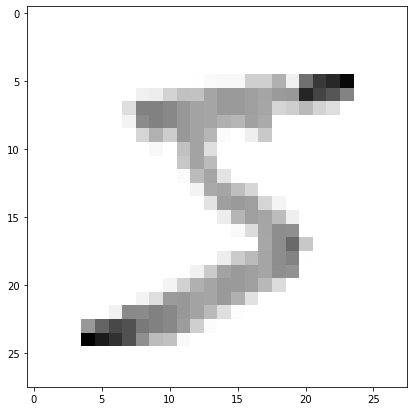

In [32]:
# Outputting the first digit from the dataset

#x_train[0] # A tensor of 28x28 pixels + value of 0 to 255 per pixel (lightness/darkness of pixel)

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()


In [27]:
# Building the model

model = tf.keras.models.Sequential() # Input Layer
model.add(tf.keras.layers.Flatten()) # Adding an inbuilt Keras "Flattening" layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # Hidden Layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # Output Layer (softmax for probability distribution)

model.compile(optimizer='adam', # default go-to optimizer
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2636 - accuracy: 0.9237
Epoch 2/3
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1103 - accuracy: 0.9656
Epoch 3/3
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0749 - accuracy: 0.9767


In [29]:
# Evaluating the model using the test data

val_loss, val_acc = model.evaluate(x_test, y_test)
print(f'Loss: {val_loss}\nAccuracy: {val_acc}')

10000/10000 [==============================] - 2s 191us/sample - loss: 0.1060 - accuracy: 0.9686
Loss: 0.1060438321851194
Accuracy: 0.9685999751091003


In [30]:
model.save('mnist_nn.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mnist_nn.model\assets


In [44]:
# Importing the model in order to make a prediction

model_2 = tf.keras.models.load_model('mnist_nn.model')

In [50]:
# Prediction only returns an array of a probability distribution,
# so np.argmax() is called on the prediction in order to get the most probable value 

predictions = model_2.predict(x_test)
np.argmax(predictions[0])

7

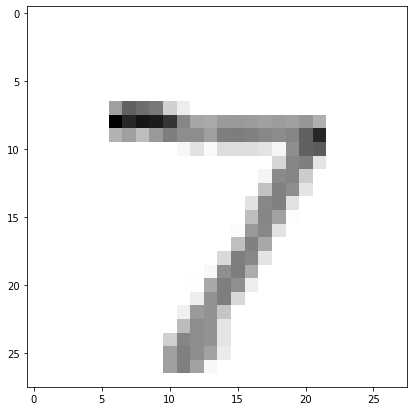

In [52]:
# Outputting the actual image of the zeroeth digit in the x_text dataset

plt.imshow(x_test[0], cmap=plt.cm.binary)